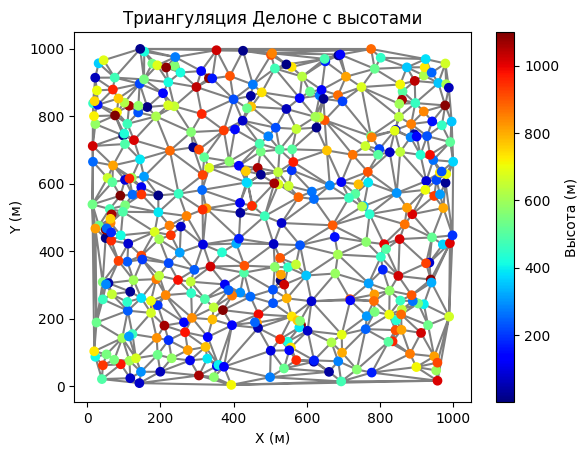

Средняя относительная погрешность интерполяции: 80.06781651435969 %


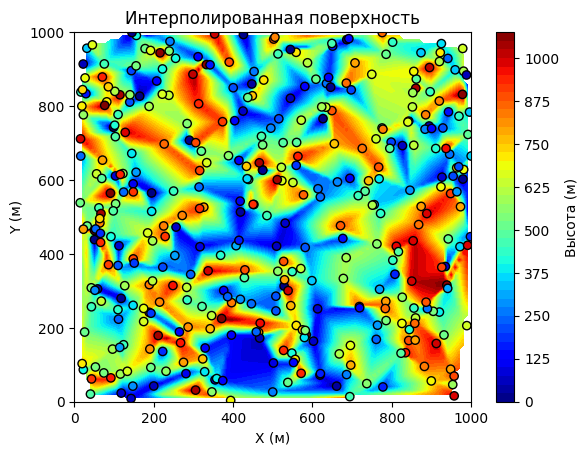

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import scipy.interpolate

# Параметры
N = 11  # Укажите свой номер варианта
num_points = 400  # Количество точек
square_size = 1000  # Размер квадрата (м)
height_range = (0, 100 * N)  # Диапазон высот

# Генерация случайных точек
x = np.random.uniform(0, square_size, num_points)
y = np.random.uniform(0, square_size, num_points)
z = np.random.uniform(height_range[0], height_range[1], num_points)
points = np.column_stack((x, y))

# Построение триангуляции Делоне
delaunay_triangulation = scipy.spatial.Delaunay(points)

# Визуализация триангуляции
plt.triplot(x, y, delaunay_triangulation.simplices, color='gray')
plt.scatter(x, y, c=z, cmap='jet', marker='o')
plt.colorbar(label='Высота (м)')
plt.xlabel('X (м)')
plt.ylabel('Y (м)')
plt.title('Триангуляция Делоне с высотами')
plt.show()

# Функция интерполяции
interp_func = scipy.interpolate.LinearNDInterpolator(points, z)

# Тестирование интерполяции
num_test_points = 10
test_x = np.random.uniform(0, square_size, num_test_points)
test_y = np.random.uniform(0, square_size, num_test_points)
test_points = np.column_stack((test_x, test_y))
estimated_heights = interp_func(test_points)

# Оценка погрешности
real_heights = np.random.uniform(height_range[0], height_range[1], num_test_points)
relative_errors = np.abs((estimated_heights - real_heights) / real_heights) * 100
mean_error = np.nanmean(relative_errors)

print("Средняя относительная погрешность интерполяции:", mean_error, "%")

# Визуализация интерполированной поверхности
grid_x, grid_y = np.meshgrid(np.linspace(0, square_size, 100), np.linspace(0, square_size, 100))
grid_z = interp_func(grid_x, grid_y)

plt.contourf(grid_x, grid_y, grid_z, cmap='jet', levels=50)
plt.colorbar(label='Высота (м)')
plt.scatter(x, y, c=z, cmap='jet', edgecolors='k', marker='o')
plt.xlabel('X (м)')
plt.ylabel('Y (м)')
plt.title('Интерполированная поверхность')
plt.show()